In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# 建構 resnet來 展示 functional api 的好處!可以建構residual layer

inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPool2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.Add()([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.Add()([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_16[0][0]                  
______________________________________________________________________________________________

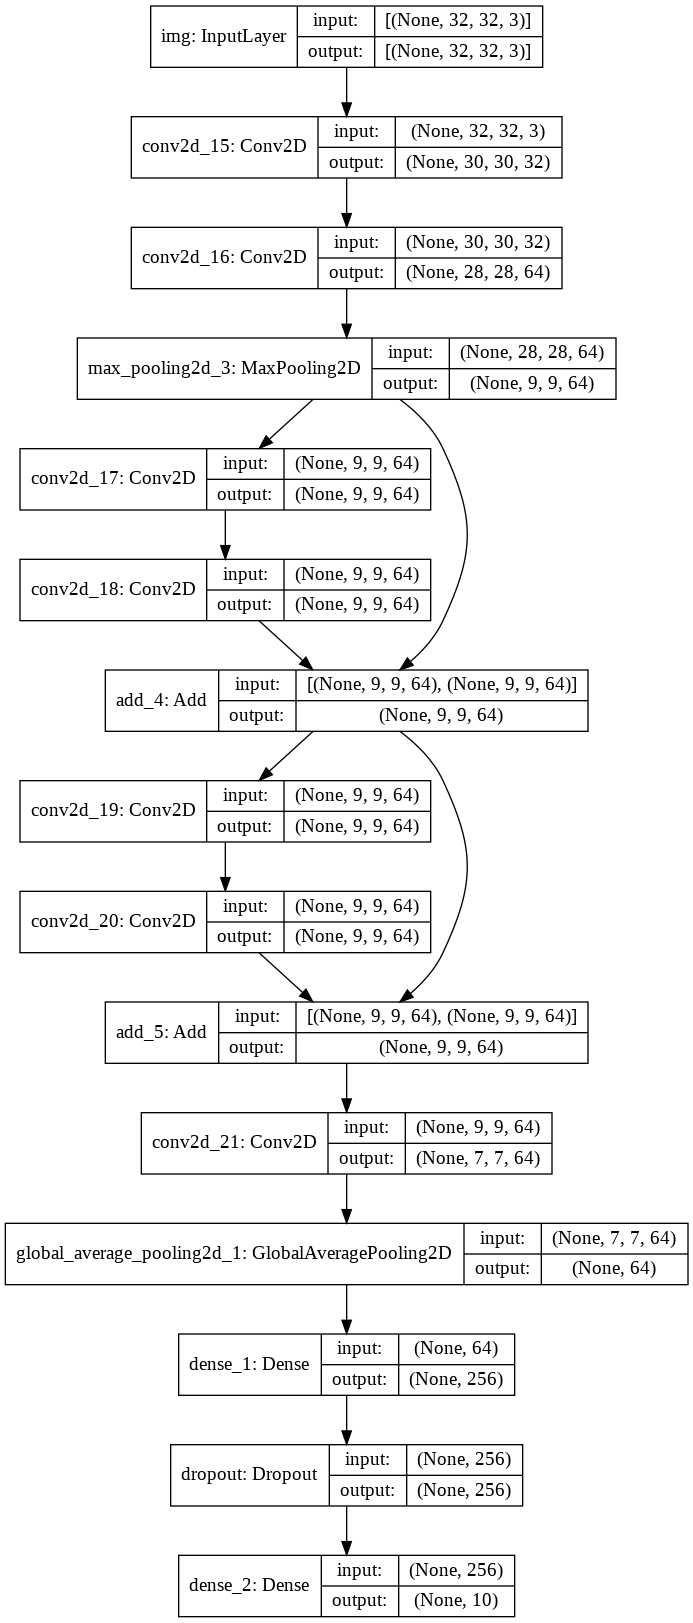

In [6]:
keras.utils.plot_model(model, 'resnet.png', show_shapes=True)

In [7]:
# 訓練!

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 4s 0us/step


In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
391/391 [==============================] - 38s 16ms/step - loss: 1.7837 - acc: 0.3028 - val_loss: 1.4737 - val_acc: 0.4351
Epoch 2/5
391/391 [==============================] - 6s 15ms/step - loss: 1.3532 - acc: 0.4959 - val_loss: 1.2770 - val_acc: 0.5290
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 1.1238 - acc: 0.5964 - val_loss: 1.0206 - val_acc: 0.6372
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 0.9756 - acc: 0.6512 - val_loss: 0.8852 - val_acc: 0.6827
Epoch 5/5
391/391 [==============================] - 6s 15ms/step - loss: 0.8664 - acc: 0.6903 - val_loss: 0.8172 - val_acc: 0.7100


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [18]:
classes = """
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
"""


'\n0\tairplane\n1\tautomobile\n2\tbird\n3\tcat\n4\tdeer\n5\tdog\n6\tfrog\n7\thorse\n8\tship\n9\ttruck\n'

6


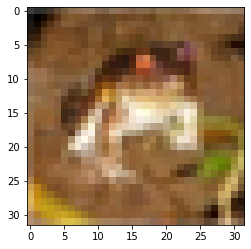

In [17]:
# print(x_train[0])
# 看一下樣本
plt.imshow(x_train[0])
print(np.argmax(y_train[0]))

In [21]:
y_pred_0 = model.predict(x_train[0:1])
y_pred_0

array([[-4.0458736 , -4.087033  ,  0.8397896 ,  2.5224016 ,  0.18509667,
         1.726333  ,  2.9052575 , -1.2772535 , -4.3036485 , -4.090723  ]],
      dtype=float32)

In [23]:
# 預測正確!

np.argmax(y_pred_0)

6